# Text Classification of Spam Detection

## Exploratory Data Analysis and Data Preprocessing and Vectorization

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Load datasets

In [2]:
# Read as text file, each line as a row
with open('/Users/minkhant/Documents/Projects/Natural Language Processing/data/raw/SMSSpamCollection', 'r', encoding='utf-8') as f:
    lines = f.readlines()

# If each line is tab-separated: label\ttext
data = [line.strip().split('\t') for line in lines]
uci = pd.DataFrame(data, columns=['label', 'text'])

In [3]:
uci.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
uci.duplicated().sum()

414

In [5]:
uci.drop_duplicates(inplace=True)
uci.duplicated().sum()

0

In [6]:
uci.replace(to_replace='ham', value='not_spam', inplace=True)

In [7]:
uci['label'].value_counts()

label
not_spam    4518
spam         642
Name: count, dtype: int64

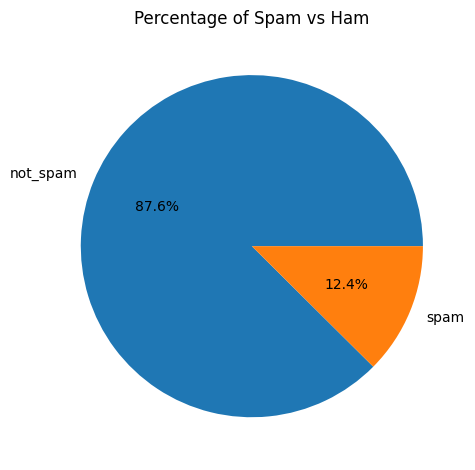

In [8]:
plt.pie(uci['label'].value_counts(), labels= ["not_spam","spam"], autopct='%1.1f%%')
plt.title('Percentage of Spam vs Ham')
plt.tight_layout()
plt.show()

In [9]:
deysi_train = pd.read_parquet('/Users/minkhant/Documents/Projects/Natural Language Processing/data/raw/train-00000-of-00001-daf190ce720b3dbb.parquet')
deysi_train.head()

,text,label
0,hey I am looking for Xray baggage datasets can...,not_spam
1,"""Get rich quick! Make millions in just days wi...",spam
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,spam
3,[Google AI Blog: Contributing Data to Deepfake...,not_spam
4,Trying to see if anyone already has timestamps...,not_spam


In [10]:
deysi_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8175 entries, 0 to 8174
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8175 non-null   object
 1   label   8175 non-null   object
dtypes: object(2)
memory usage: 127.9+ KB


In [11]:
deysi_test = pd.read_parquet('/Users/minkhant/Documents/Projects/Natural Language Processing/data/raw/test-00000-of-00001-fa9b3e8ade89a333.parquet')
deysi_test.head()

,text,label
0,"Deezer.com 10,406,168 Artist DB\n\nWe have sc...",not_spam
1,🚨 ATTENTION ALL USERS! 🚨\n\n🆘 Are you looking ...,spam
2,I'm working on a stats project to test some of...,not_spam
3,"[[Sorry, I cannot generate inappropriate or sp...",spam
4,L@@k at these Unbelievable diet pills that can...,spam


In [12]:
deysi_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725 entries, 0 to 2724
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2725 non-null   object
 1   label   2725 non-null   object
dtypes: object(2)
memory usage: 42.7+ KB


In [13]:
df = pd.concat([deysi_train, deysi_test, uci], axis=0).reset_index(drop=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16060 entries, 0 to 16059
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16060 non-null  object
 1   label   16060 non-null  object
dtypes: object(2)
memory usage: 251.1+ KB


In [15]:
df['label'].unique()

array(['not_spam', 'spam'], dtype=object)

In [16]:
df['label'].value_counts()

label
not_spam    9918
spam        6142
Name: count, dtype: int64

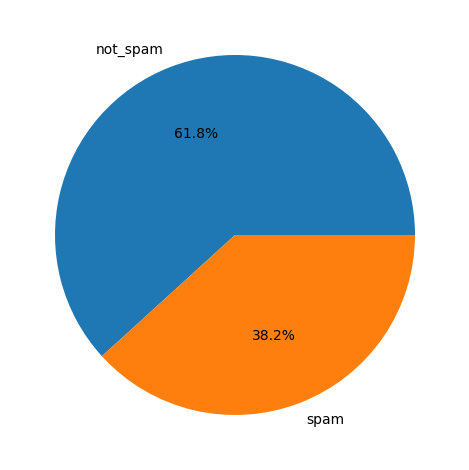

In [17]:
plt.pie(df['label'].value_counts(), labels=df['label'].unique(), autopct='%1.1f%%')
# plt.title("Percentage of Spam vs Not Spam")
plt.tight_layout()
plt.savefig('/Users/minkhant/Documents/Projects/Natural Language Processing/image/Percentage of Spam Vs Not Spam')
plt.show()

In [18]:
from sklearn.utils import resample

ham = df[df['label'] == 'not_spam']
spam = df[df['label'] == 'spam']

ham_downsampled = resample(ham,
                            replace=False,
                            n_samples=len(spam),
                            random_state=42)

df_balanced = pd.concat([ham_downsampled, spam])
print(df_balanced['label'].value_counts())

label
not_spam    6142
spam        6142
Name: count, dtype: int64


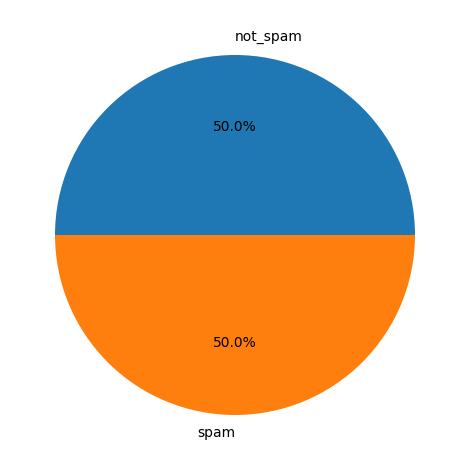

In [19]:
plt.pie(df_balanced['label'].value_counts(), labels=df_balanced['label'].unique(), autopct='%1.1f%%')
# plt.title("Percentage of Spam vs Not Spam")
plt.tight_layout()
plt.savefig('/Users/minkhant/Documents/Projects/Natural Language Processing/image/Balanced Dataset')
# plt.show()

## Data Preprocessing

In [20]:
df_balanced['target'] = df_balanced['label'].apply(lambda x: 1 if x == 'spam' else 0)
df_balanced.head()

,text,label,target
5752,[ Removed by reddit on account of violating th...,not_spam,0
15752,If I die I want u to have all my stuffs.,not_spam,0
726,Trying to find an up to date dataset for suici...,not_spam,0
2507,I want to learn what the most popular part of ...,not_spam,0
9026,I'm looking for a dataset to use in a presenta...,not_spam,0


In [21]:
df_balanced.isnull().sum()

text      0
label     0
target    0
dtype: int64

In [22]:
df_balanced['target'].value_counts()

target
0    6142
1    6142
Name: count, dtype: int64

In [23]:
df_balanced.duplicated().sum()

101

In [24]:
df_balanced['text'].loc[67:70]

67    "Get ready for the most epic sale ever!!!1!🎉🎉🎉...
69    Don't be a square, join the cool kids on our p...
70    ***Attention everyone***! 🚨🚨 \n\n🦐 Do you love...
Name: text, dtype: object

In [25]:
URL_RE   = r"(https?://\S+|www\.\S+)"
EMAIL_RE = r"\b[\w\.-]+@[\w\.-]+\.\w+\b"
PHONE_RE = r"\b(?:\+?\d{1,3})?[-.\s]?(?:\(?\d{2,4}\)?)[-.\s]?\d{3,4}[-.\s]?\d{3,4}\b"
CURR_RE  = r"[$£€฿]"
NUM_RE   = r"\b\d+(?:[\.,]\d+)?\b"
USER_RE  = r"@\w+"
HASH_RE  = r"#\w+"

def clean_text(s: str) -> str:
    s = str(s).lower()
    s = re.sub(URL_RE, " <url> ", s)
    s = re.sub(EMAIL_RE, " <email> ", s)
    s = re.sub(PHONE_RE, " <phone> ", s)
    s = re.sub(CURR_RE, " <currency> ", s)
    s = re.sub(USER_RE, " <user> ", s)
    s = re.sub(HASH_RE, lambda m: " " + m.group(0).replace("#","<hashtag_") + "> ", s)
    s = re.sub(NUM_RE, " <number> ", s)
    s = re.sub(r"[^a-z0-9<>\s'!?.,-]+", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

In [26]:
df_balanced['text_cleaned'] = df_balanced['text'].apply(clean_text)

In [27]:
df_balanced['text_cleaned'].loc[67:70]

67    get ready for the most epic sale ever!!! <numb...
69    don't be a square, join the cool kids on our p...
70    attention everyone ! do you love shrimp? how a...
Name: text_cleaned, dtype: object

In [28]:
df_balanced['text_cleaned'].loc[101]

"check out the latest deals on our platform! don't miss out on the chance to save big on all your favorite products. we've got everything from fashion to electronics to home goods."

In [29]:
df_balanced.to_parquet('/Users/minkhant/Documents/Projects/Natural Language Processing/data/preprocessed/full_dataset.parquet', index=False)

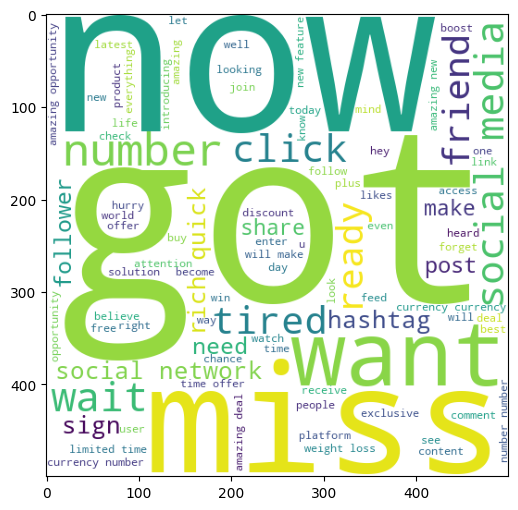

In [30]:
from wordcloud import WordCloud

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df_balanced[df_balanced['target'] == 1]['text_cleaned'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.savefig('/Users/minkhant/Documents/Projects/Natural Language Processing/image/Spam Words')
plt.show()

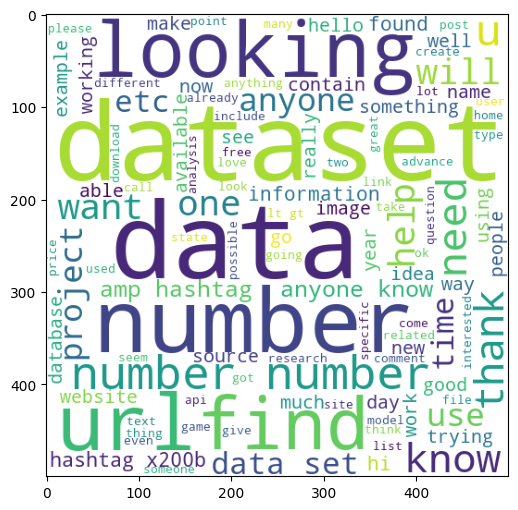

In [31]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df_balanced[df_balanced['target'] == 0]['text_cleaned'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.savefig('/Users/minkhant/Documents/Projects/Natural Language Processing/image/Not-Spam Words')
plt.show()

## TF-IDF Vectorization

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2),
                             stop_words='english',
                             lowercase=True,
                             max_features=5000)

In [33]:
X = vectorizer.fit_transform(df_balanced['text_cleaned'])

In [34]:
X.shape

(12284, 5000)

In [35]:
from scipy import sparse

In [36]:
sparse.save_npz('/Users/minkhant/Documents/Projects/Natural Language Processing/data/preprocessed/tfidf_matrix.npz', X)


In [37]:
vectorizer.get_feature_names_out()

array(['0f', '0n', '0ur', ..., 'zip', 'zip code', 'zone'], dtype=object)

In [38]:
vectorizer.vocabulary_

{'removed': 3744,
 'reddit': 3713,
 'account': 37,
 'content': 756,
 'policy': 3422,
 'help': 1959,
 'die': 1067,
 'want': 4769,
 'trying': 4555,
 'date': 953,
 'dataset': 927,
 'including': 2115,
 'number': 3053,
 'covid': 818,
 'times': 4436,
 'obvious': 3149,
 'reasons': 3692,
 'mask': 2732,
 'guys': 1872,
 'best': 334,
 'relatively': 3735,
 'new': 2978,
 'data': 887,
 'science': 3891,
 'pointers': 3417,
 'getting': 1730,
 'raw': 3655,
 'cdc': 540,
 'data science': 910,
 'raw data': 3656,
 'learn': 2403,
 'popular': 3432,
 'city': 616,
 'use': 4649,
 'instagram': 2163,
 'way': 4821,
 'finding': 1538,
 'collect': 664,
 'photos': 3342,
 'different': 1076,
 'parts': 3285,
 'counting': 802,
 'measure': 2758,
 'taken': 4318,
 'taking': 4320,
 'alternative': 112,
 'suggestion': 4265,
 'want use': 4798,
 'collect data': 665,
 'looking': 2594,
 'maps': 2725,
 'google': 1774,
 'set': 3967,
 'longitude': 2577,
 'latitude': 2395,
 'plot': 3397,
 'thought': 4390,
 'cool': 775,
 'example': 1335,

In [39]:
import joblib

In [40]:
joblib.dump(vectorizer, '/Users/minkhant/Documents/Projects/Natural Language Processing/models/tfidf_vectorizer.pkl')

['/Users/minkhant/Documents/Projects/Natural Language Processing/models/tfidf_vectorizer.pkl']

In [41]:
all_feature_names = vectorizer.get_feature_names_out()
for word in all_feature_names:
    indx=vectorizer.vocabulary_.get(word)
    print (f"{word} {vectorizer.idf_[indx]}")

0f 7.851184927493743
0n 7.851184927493743
0ur 7.70808408385307
0ut 7.7770769553400205
10k 7.238080454607334
10p 7.325091831596963
12hrs 7.643545562715499
150p 6.390782594220131
150p msg 7.7770769553400205
150ppm 7.048838454968806
16 9.722987104395335
16 number 9.722987104395335
1st 7.083929774780075
2017 8.624374815727226
2017 number 8.624374815727226
2nd 7.12029741895095
2nd attempt 7.70808408385307
3d 7.643545562715499
4nd 8.113549191961233
ability 6.778548125228894
able 4.770687387312043
able resist 7.643545562715499
abs 7.7770769553400205
absolute 7.325091831596963
absolutely 5.985317486111966
absolutely free 7.471695305788839
abt 7.371611847231857
academic 6.889773760339118
access 4.066995293575482
access exclusive 5.316267857131081
access hottest 7.582920940899063
access latest 7.582920940899063
access premium 7.420402011401288
access secret 7.582920940899063
accessible 7.28064006902613
accessories 6.889773760339118
according 7.582920940899063
account 4.982412281401039
account ex